In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [6]:
tele = df.copy()

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


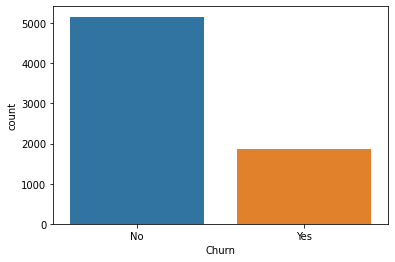

In [11]:
sns.countplot(df['Churn'])

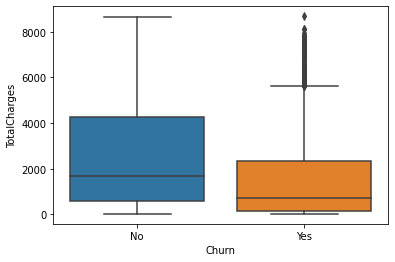

In [12]:
sns.boxplot(data=df,y='TotalCharges',x='Churn')

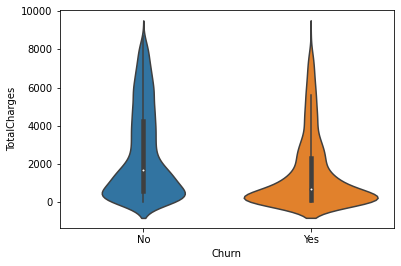

In [13]:
sns.violinplot(data=df,y='TotalCharges',x='Churn')

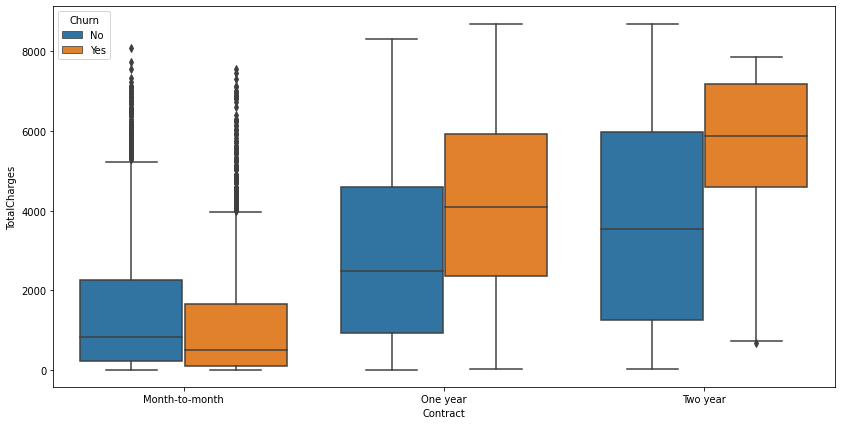

In [14]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')

In [15]:
# Numerical Features
numerical = [features for features in df.columns if df[features].dtype!='O']
numerical

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
# Continuous Features 
continuous = [features for features in numerical if df[features].nunique()>=25]
continuous

['tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
# Discrete Feature
dis = [features for features in numerical if df[features].nunique()<25]
dis

['SeniorCitizen']

In [18]:
# Categorical Features
category = [features for features in df.columns if df[features].dtype=='O']
category

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [19]:
for i in category:
  print(i,df[i].unique())
  print(df[i].nunique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7032
gender ['Female' 'Male']
2
Partner ['Yes' 'No']
2
Dependents ['No' 'Yes']
2
PhoneService ['No' 'Yes']
2
MultipleLines ['No phone service' 'No' 'Yes']
3
InternetService ['DSL' 'Fiber optic' 'No']
3
OnlineSecurity ['No' 'Yes' 'No internet service']
3
OnlineBackup ['Yes' 'No' 'No internet service']
3
DeviceProtection ['No' 'Yes' 'No internet service']
3
TechSupport ['No' 'Yes' 'No internet service']
3
StreamingTV ['No' 'Yes' 'No internet service']
3
StreamingMovies ['No' 'Yes' 'No internet service']
3
Contract ['Month-to-month' 'One year' 'Two year']
3
PaperlessBilling ['Yes' 'No']
2
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4
Churn ['No' 'Yes']
2


In [20]:
df['customerID'].nunique()

7032

In [21]:
df.drop('customerID',axis=1,inplace=True)

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df = pd.get_dummies(df,drop_first=True)

In [24]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


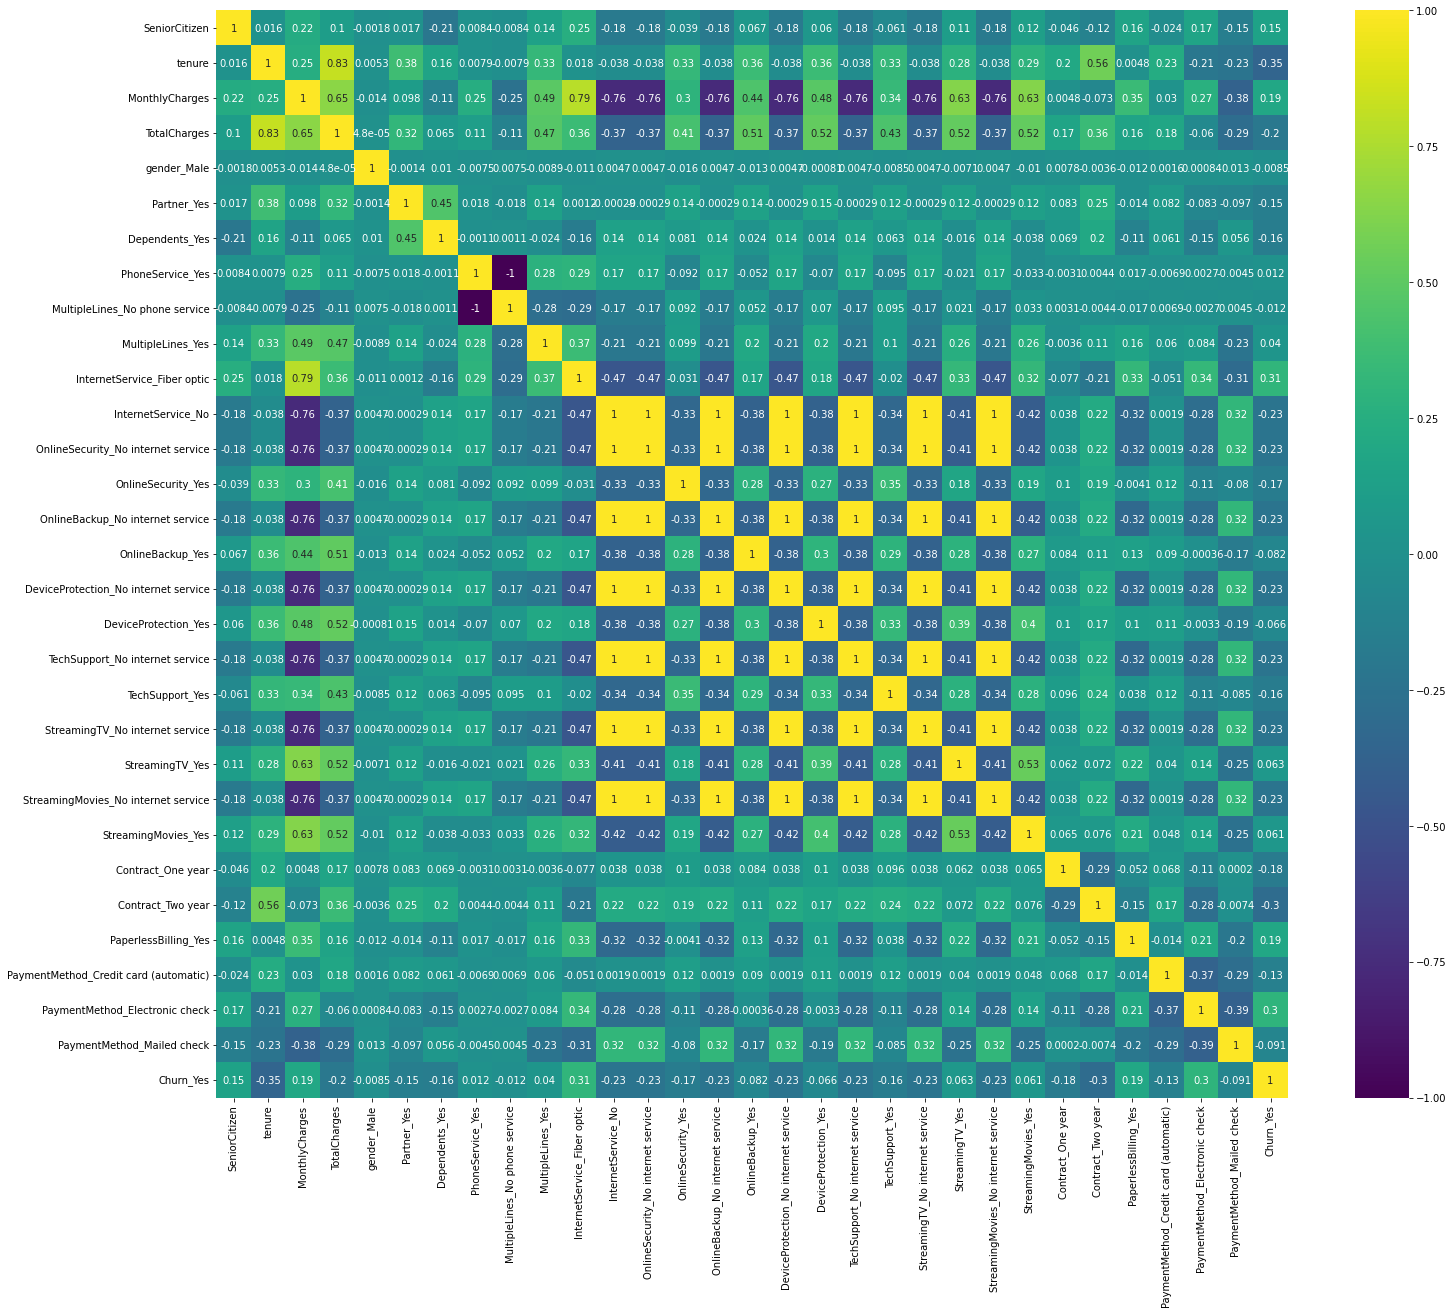

In [25]:
plt.figure(figsize=(24,20))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [26]:
len(df.columns)

31

In [27]:
X = df.drop('Churn_Yes',axis=1)

In [28]:
y = df['Churn_Yes']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)
pred_decision = decision.predict(X_test)

In [33]:
from sklearn.tree import plot_tree

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [35]:
confusion_matrix(y_test,pred_decision)

array([[435, 122],
       [ 75,  72]])

In [36]:
print(classification_report(y_test,pred_decision))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       557
           1       0.37      0.49      0.42       147

    accuracy                           0.72       704
   macro avg       0.61      0.64      0.62       704
weighted avg       0.75      0.72      0.73       704



In [37]:
max_depth  = DecisionTreeClassifier(max_depth=3)
max_depth.fit(X_train,y_train)
pred_max_depth = max_depth.predict(X_test)

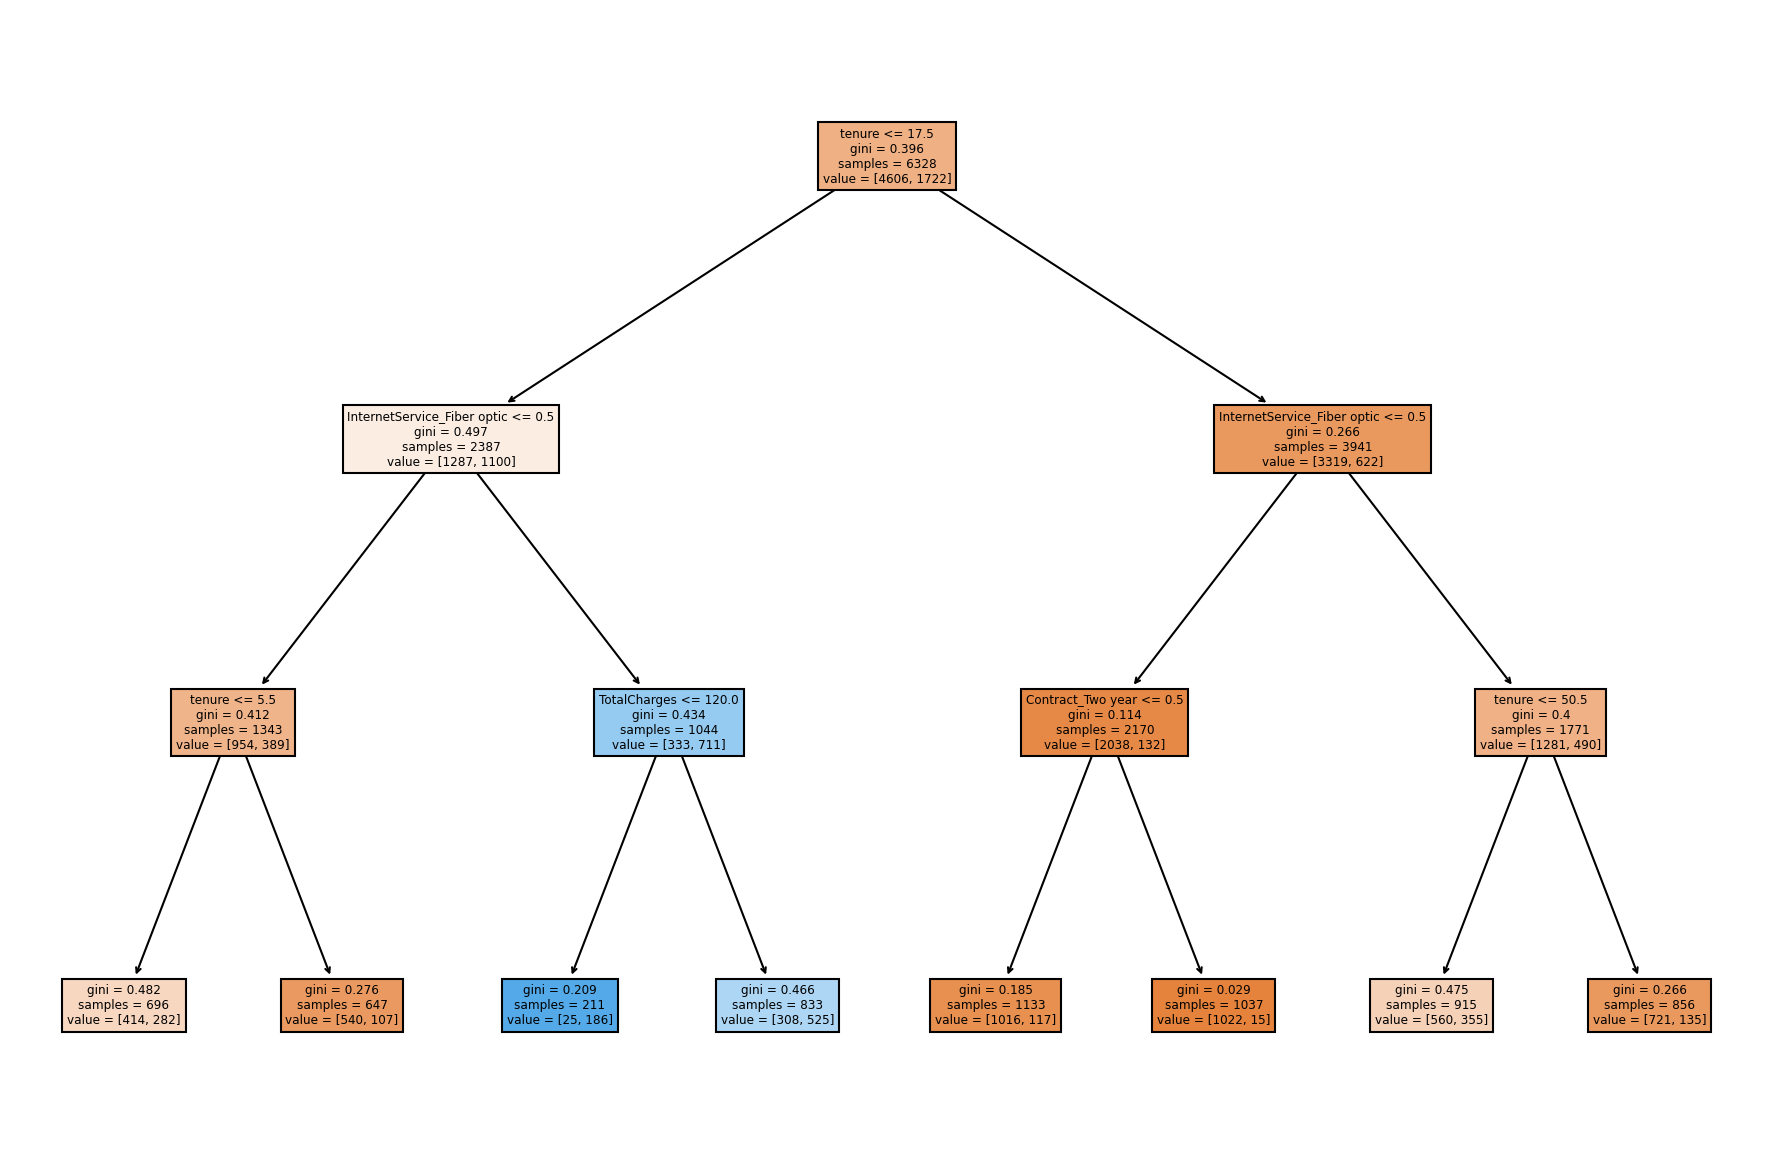

In [38]:
plt.figure(figsize=(15,10),dpi=150)
plot_tree(max_depth,feature_names=X.columns,filled=True);

In [39]:
confusion_matrix(y_test,pred_max_depth)

array([[523,  34],
       [ 97,  50]])

In [40]:
print(classification_report(y_test,pred_max_depth))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       557
           1       0.60      0.34      0.43       147

    accuracy                           0.81       704
   macro avg       0.72      0.64      0.66       704
weighted avg       0.79      0.81      0.79       704



In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
random  = RandomForestClassifier(n_estimators=100,bootstrap=True,oob_score=True)
random.fit(X_train,y_train)
pred_random = random.predict(X_test)

In [43]:
confusion_matrix(y_test,pred_random)

array([[490,  67],
       [ 83,  64]])

In [44]:
print(classification_report(y_test,pred_random))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       557
           1       0.49      0.44      0.46       147

    accuracy                           0.79       704
   macro avg       0.67      0.66      0.66       704
weighted avg       0.78      0.79      0.78       704



Since the dataset is imbalanced i used SMOTE to create oversample and apply Randomforest to get good precision,recall and F1-score


In [45]:
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
tele.drop('customerID',axis=1,inplace=True)

In [50]:
X = pd.get_dummies(tele.drop('Churn',axis=1),drop_first=True)

In [52]:
y = tele['Churn']

In [56]:
y.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
smote = SMOTE(sampling_strategy='minority')

In [57]:
x,z = smote.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [66]:
len(z)

10326

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, z, test_size=0.2, random_state=42,stratify = z)

In [61]:
from sklearn.ensemble import RandomForestClassifier
random1 = RandomForestClassifier(n_estimators=100)
random1.fit(X_train,y_train)
prediction = random1.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
confusion_matrix(y_test,prediction)

array([[912, 121],
       [168, 865]])

In [65]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1033
         Yes       0.88      0.84      0.86      1033

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066

